In [1]:
from agents.gmail.agent import GmailAgent
from google_client.user_client import UserClient

from dotenv import load_dotenv
load_dotenv()

token_path = r"C:\Users\dagms\Projects\Credentials\token-1.json"
creds_path = r"C:\Users\dagms\Projects\Credentials\credentials.json"

user = UserClient.from_file(token_path, creds_path)
gmail_service = user.gmail

agent = GmailAgent(gmail_service)

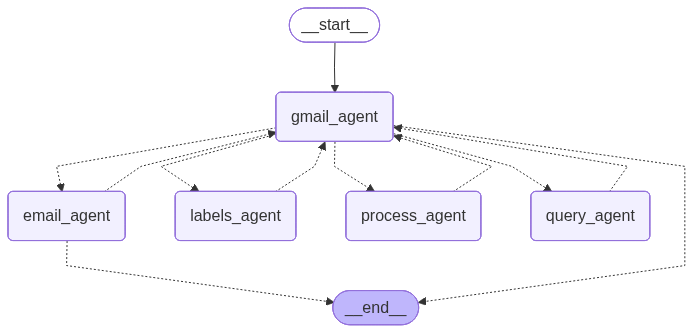

In [2]:
from langchain_core.runnables.graph import MermaidDrawMethod
from IPython.display import Image, display
display(Image(agent.research_graph.get_graph().draw_mermaid_png()))

In [2]:

for s in agent.research_graph.stream(
        {"messages": [("user", "how many non promotional emails did i get today")]},
        {"recursion_limit": 5},
):
    print(s)
    print("---")

[chain/start] [chain:LangGraph] Entering Chain run with input:
{
  "messages": [
    [
      "user",
      "how many non promotional emails did i get today"
    ]
  ]
}
[chain/start] [chain:LangGraph > chain:gmail_agent] Entering Chain run with input:
[inputs]
[chain/start] [chain:LangGraph > chain:gmail_agent > chain:RunnableSequence] Entering Chain run with input:
[inputs]
[llm/start] [chain:LangGraph > chain:gmail_agent > chain:RunnableSequence > llm:ChatAnthropic] Entering LLM run with input:
{
  "prompts": [
    "System: \nYou are a helpful gmail supervisor assistant tasked with managing a conversation between\nthe following workers: ['email_agent', 'labels_agent', 'process_agent', 'query_agent']\n\nGiven the following user request, respond with the worker to act next.\nEach worker will perform a task and respond with their results and status.\n\nWhen finished respond with FINISH.\n\nHuman: how many non promotional emails did i get today"
  ]
}
[llm/end] [chain:LangGraph > chain:g

GraphRecursionError: Recursion limit of 5 reached without hitting a stop condition. You can increase the limit by setting the `recursion_limit` config key.
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/GRAPH_RECURSION_LIMIT